<a href="https://colab.research.google.com/github/Edward-TL/Beer_Statistics/blob/master/only_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy.stats
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import csv, os
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def csv_as_dictionary(file):
    with open(beer_csv, mode="r", encoding='utf-8', newline='') as csv_file:
        csv_reader = csv.reader(csv_file)
        header = next(csv_reader)
        
        column_data = ''
        data_date = []
        av_temp = []
        min_temp = []
        max_temp = []
        precipitation = []
        was_a_weekend = []
        beer_consumed = []
        
        for row in csv_reader:
            #No 'problem'
    
            if row[0]!= '': data_date.append(datetime.strptime(row[0], '%Y-%m-%d'))
                
            if row[5] != '': was_a_weekend.append(bool(int(row[5])))
            
            #Comma problem
            if row[1] != '': av_temp.append(float(row[1].replace(',','.')))
            if row[2] != '': min_temp.append(float(row[2].replace(',','.')))
            if row[3] != '': max_temp.append(float(row[3].replace(',','.')))
            if row[4] != '': precipitation.append(float(row[4].replace(',','.')))
            
            #Period Problem
            if row[6] != '': beer_consumed.append(int(row[6].replace('.','')))
            
    csv_file.close()

    dictionary = {
        'date': data_date,
        'av_temp': av_temp,
        'min_temp': min_temp,
        'max_temp': max_temp,
        'precipitation': precipitation,
        'was_a_weekend': was_a_weekend,
        'beer_consumed': beer_consumed
    }
    return dictionary

In [3]:
beer_csv = '/content/drive/My Drive/Colab Notebooks/RetoCerveza/datasets_28454_184859_Consumo_cerveja.csv'

cerveza_dict = csv_as_dictionary(beer_csv)
cerveza_df = pd.DataFrame(cerveza_dict)
cerveza_df

,date,av_temp,min_temp,max_temp,precipitation,was_a_weekend,beer_consumed
0,2015-01-01,27.30,23.9,32.5,0.0,False,25461
1,2015-01-02,27.02,24.5,33.5,0.0,False,28972
2,2015-01-03,24.82,22.4,29.9,0.0,True,30814
3,2015-01-04,23.98,21.5,28.6,1.2,True,29799
4,2015-01-05,23.82,21.0,28.3,0.0,False,28900
...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,True,32307
361,2015-12-28,22.64,21.1,26.7,0.0,False,26095
362,2015-12-29,21.68,20.3,24.1,10.3,False,22309
363,2015-12-30,21.38,19.3,22.4,6.3,False,20467


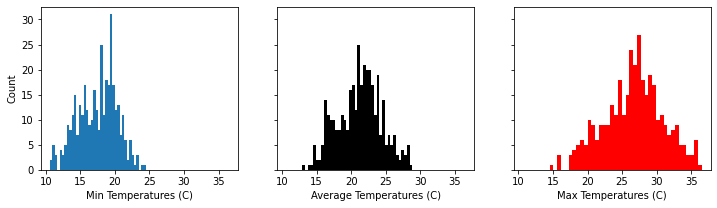

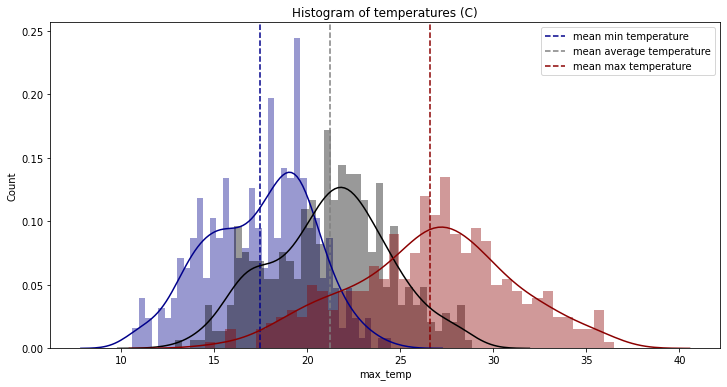

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3), sharey=True, sharex=True)
n_bins = 40

ax1.hist(cerveza_df['min_temp'], align = 'mid', bins = n_bins)
ax1.set_xlabel('Min Temperatures (C)')
ax1.set_ylabel('Count')

ax2.hist(cerveza_df['av_temp'], align = 'mid', color='k', bins = n_bins)
ax2.set_xlabel('Average Temperatures (C)')

ax3.hist(cerveza_df['max_temp'], align = 'mid', color='r', bins = n_bins)
ax3.set_xlabel('Max Temperatures (C)')

plt.show()

kwargs = dict(alpha=0.5, bins = 40, density=True, stacked = True)

plt.figure(figsize=(12,6))

x1=cerveza_df['min_temp']
x2=cerveza_df['av_temp']
x3=cerveza_df['max_temp']

# plt.hist(x1, **kwargs, color = 'b', label='min_temp')
# plt.hist(x2, **kwargs, color = 'k', label='av_temp')
# plt.hist(x3, **kwargs, color = 'r', label='max_temp')
plt.gca().set(title='Histogram of temperatures (C)', ylabel='Count')

plt.axvline(np.mean(x1), c='darkblue', linestyle='--', label = 'mean min temperature')
plt.axvline(np.mean(x2), c='gray', linestyle='--', label = 'mean average temperature')
plt.axvline(np.mean(x3), c='darkred', linestyle='--', label = 'mean max temperature')

sns.distplot(x1, bins=40, color='darkblue')
sns.distplot(x2, bins=40, color='k')
sns.distplot(x3, bins=40, color='darkred')

plt.legend()

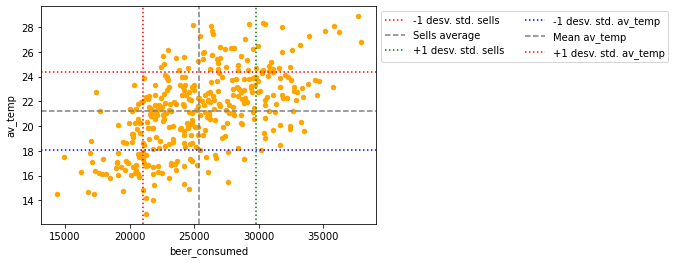

In [5]:
x=cerveza_df['beer_consumed']
y=cerveza_df['av_temp']
fig = cerveza_df.plot(kind="scatter", x = 'beer_consumed', y = 'av_temp',c = 'orange')

plt.axvline(np.mean(x)-np.std(x), c = 'r', linestyle = ':', label = '-1 desv. std. sells')
plt.axvline(np.mean(x), c = 'grey', linestyle = '--', label = 'Sells average')
plt.axvline(np.mean(x)+np.std(x), c = 'g', linestyle = ':', label = '+1 desv. std. sells')

plt.axhline(np.mean(y)-np.std(y), c = 'b', linestyle = ':', label = '-1 desv. std. av_temp')
plt.axhline(np.mean(y), c = 'grey', linestyle = '--', label = 'Mean av_temp')
plt.axhline(np.mean(y)+np.std(y), c = 'r', linestyle = ':', label = '+1 desv. std. av_temp')

plt.legend(loc='best', bbox_to_anchor=(1,1), ncol=2)

plt.show()

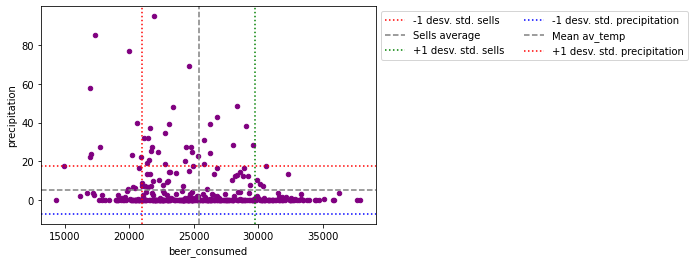

In [6]:
x=cerveza_df['beer_consumed']
y=cerveza_df['precipitation']
fig = cerveza_df.plot(kind="scatter", x = 'beer_consumed', y = 'precipitation',c = 'purple')

plt.axvline(np.mean(x)-np.std(x), c = 'r', linestyle = ':', label = '-1 desv. std. sells')
plt.axvline(np.mean(x), c = 'grey', linestyle = '--', label = 'Sells average')
plt.axvline(np.mean(x)+np.std(x), c = 'g', linestyle = ':', label = '+1 desv. std. sells')

plt.axhline(np.mean(y)-np.std(y), c = 'b', linestyle = ':', label = '-1 desv. std. precipitation')
plt.axhline(np.mean(y), c = 'grey', linestyle = '--', label = 'Mean av_temp')
plt.axhline(np.mean(y)+np.std(y), c = 'r', linestyle = ':', label = '+1 desv. std. precipitation')

plt.legend(loc='best', bbox_to_anchor=(1,1), ncol=2)

plt.show()

In [7]:
def csv_as_arrays(file):
    with open(beer_csv, mode="r", encoding='utf-8', newline='') as csv_file:
        csv_reader = csv.reader(csv_file)
        header = next(csv_reader)
        
        column_data = ''
        data_date = []
        av_temp = []
        min_temp = []
        max_temp = []
        precipitation = []
        was_a_weekend = []
        beer_consumed = []
        
        for row in csv_reader:
            #No 'problem'
    
            if row[0]!= '': data_date.append(datetime.strptime(row[0], '%Y-%m-%d'))
                
            if row[5] != '': was_a_weekend.append(bool(int(row[5])))
            
            #Comma problem
            if row[1] != '': av_temp.append(float(row[1].replace(',','.')))
            if row[2] != '': min_temp.append(float(row[2].replace(',','.')))
            if row[3] != '': max_temp.append(float(row[3].replace(',','.')))
            if row[4] != '': precipitation.append(float(row[4].replace(',','.')))
            
            #Period Problem
            if row[6] != '': beer_consumed.append(int(row[6].replace('.','')))
            
    csv_file.close()

    return data_date, was_a_weekend, av_temp, min_temp, max_temp, precipitation, beer_consumed

In [8]:
data_date, was_a_weekend, av_temp, min_temp, max_temp, precipitation, beer_consumed = csv_as_arrays(beer_csv)

In [9]:
def match_cases(array_filter, array):
  match_cases = []

  #Creating Support dictionaries
  wanted_cases = set(array_filter)
  
  for ub in range(len(array)):
    val = array[ub]
    if val in wanted_cases: match_cases.append(ub)
      
  return match_cases

def top_condisioned(array, start_value):
  helper_array = sorted_set(array.copy())
  helpers_end = len(helper_array) - 1
  ubication =  binary_search(helper_array, 0, helpers_end, start_value)
  
  top_condisioned = []
  for i in range(ubication, helpers_end):
    top_condisioned.append(helper_array[i])

  return top_condisioned

def sorted_set(array):
  reduced_set = set(array)
  reduced_array = []
  for element in reduced_set:
    reduced_array.append(element)
  reduced_array = merge_sort(reduced_array)

  return reduced_array

def binary_search(array, start, end, search_value):
  if start > end:
    return end
  
  middle = (start + end) // 2

  if array[middle] == search_value:
    return middle
  elif array[middle] < search_value:
    return binary_search(array, middle + 1, end, search_value)
  else:
    return binary_search(array, start, middle - 1, search_value)

def merge_sort(array):
  if len(array) > 1:
    middle = len(array) // 2
    left = array[:middle]
    right = array[middle:]

    merge_sort(left)
    merge_sort(right)
    
    """SubArrays Iterators"""
    i = 0
    j = 0
    """MainArray Iterator"""
    k = 0

    while i < len(left) and j < len(right):
      if left[i] < right[j]:
        array[k] = left[i]
        i += 1
      else:
        array[k] = right[j]
        j += 1
      
      k += 1

    while i < len(left):
      array[k] = left[i]
      i += 1
      k += 1

    while j < len(right):
      array[k] = right[j]
      j += 1
      k += 1

  return array

def boolean_clasification(array):
  true_array = []
  false_array = []

  for i in range(len(array)):
    if array[i] == True:
      true_array.append(array[i])
    else: false_array.append(array[i])
  
  return true_array, false_array

def extract_matches(array_filter, array):
    match_cases = []

    #Creating Support dictionaries
    wanted_cases = set(array_filter)

    for ub in range(len(array)):
        val = array[ub]
        if val in wanted_cases: match_cases.append(array[ub])
    return match_cases

def all_major_cases(array, value):
    major_cases = []

    for ub in range(len(array)):
        if array[ub] >= value: major_cases.append(array[ub])

    return major_cases

def all_minor_cases(array, value):
    minor_cases = []

    for ub in range(len(array)):
        if array[ub] <= value: minor_cases.append(array[ub])

    return minor_cases

def all_equal_cases(array, value):
    equal_cases = []

    for ub in range(len(array)):
        if array[ub] == value: equal_cases.append(array[ub])

    return equal_cases

def all_not_equal_cases(array, value):
    not_equal_cases = []

    for ub in range(len(array)):
        if array[ub] != value: not_equal_cases.append(array[ub])

    return not_equal_cases

def all_bool_cases(array, bool_value):
    bool_cases = []

    for ub in range(len(array)):
        if array[ub] == value: bool_cases.append(array[ub])

    return bool_cases

In [10]:
gta_sells = top_condisioned(beer_consumed,np.mean(beer_consumed))
len(gta_sells)

166

In [11]:
ub_gta_sells = match_cases(gta_sells, beer_consumed)

In [12]:
gta_av_temp = []
gta_week_day = []
gta_precipitation = []

for i in range(len(ub_gta_sells)):
  match = ub_gta_sells[i]
  gta_av_temp.append(av_temp[match])
  gta_week_day.append(was_a_weekend[match])
  gta_precipitation.append(precipitation[match])

print(f'len of gta_av_temp: {len(gta_av_temp)}')
print(f'len of gta_week_day: {len(gta_week_day)}')
print(f'len of gta_precipitation: {len(gta_precipitation)}')

len of gta_av_temp: 167
len of gta_week_day: 167
len of gta_precipitation: 167


In [37]:
pls_std_best_sells = np.mean(beer_consumed)+np.std(beer_consumed)
best_sells_values = top_condisioned(beer_consumed,pls_std_best_sells)
print(best_sells_values)
print(len(best_sells_values))
print(max(best_sells_values))

ub_best_sells = match_cases(best_sells_values, beer_consumed)

[29760, 29799, 29829, 29926, 29938, 29972, 30127, 30177, 30231, 30300, 30329, 30345, 30392, 30471, 30479, 30498, 30505, 30524, 30617, 30740, 30775, 30814, 30825, 30943, 31088, 31108, 31129, 31139, 31310, 31387, 31572, 31649, 31655, 31663, 31681, 31825, 31833, 31836, 31933, 32057, 32184, 32307, 32451, 32467, 32473, 32536, 32589, 32666, 32713, 32780, 32872, 32983, 33182, 33298, 33330, 33450, 33517, 33822, 33930, 34382, 34496, 34695, 35127, 35781, 35861, 36254, 37690]
67
37690


In [41]:
best_sells = []
best_av_temp = []
best_week_day = []
best_precipitation = []

for i in range(len(ub_best_sells)):
  match = ub_best_sells[i]
  best_av_temp.append(av_temp[match])
  best_week_day.append(was_a_weekend[match])
  best_precipitation.append(precipitation[match])
  best_sells.append(beer_consumed[match])

print(f'best_av_temp: {len(best_av_temp)}')
print(f'best_week_day: {len(best_week_day)}')
print(f'best_precipitation: {len(best_precipitation)}')
print(f'best_sells: {len(best_sells)}')

best_av_temp: 67
best_week_day: 67
best_precipitation: 67
best_sells: 67


In [14]:
best_av_temp = []
best_week_day = []
best_precipitation = []

for i in range(len(ub_best_sells)):
  match = ub_best_sells[i]
  best_av_temp.append(av_temp[match])
  best_week_day.append(was_a_weekend[match])
  best_precipitation.append(precipitation[match])

print(f'len of best_av_temp: {len(best_av_temp)}  best_week_day: {len(best_week_day)} best_precipitation: {len(best_precipitation)}')

len of best_av_temp: 67  best_week_day: 67 best_precipitation: 67


In [15]:
cold_best_sells = all_minor_cases(best_av_temp, np.mean(av_temp))
hot_best_sells = all_major_cases(best_av_temp, np.mean(av_temp))
cold_gta_sells = all_minor_cases(gta_av_temp, np.mean(av_temp))
print(f'best sells on cold days: {len(cold_best_sells)} of {len(best_av_temp)} = {len(cold_best_sells)/len(best_av_temp)*100} %')
print(f'best sells on hot days: {len(hot_best_sells)} of {len(best_av_temp)} = {len(hot_best_sells)/len(best_av_temp)*100} %')
print(f'Greater than average sells on cold days: {len(cold_gta_sells)} of {len(gta_av_temp)} = {len(cold_gta_sells)/len(gta_av_temp)*100} %')

best sells on cold days: 14 of 67 = 20.8955223880597 %
best sells on hot days: 53 of 67 = 79.1044776119403 %
Greater than average sells on cold days: 44 of 167 = 26.34730538922156 %


In [16]:
weekend_sells = [0,0]
week_sells = [0,0]

gta_weekend_sells, gta_middle_week_sells = boolean_clasification(gta_week_day)
weekend_sells[0], week_sells[0] = len(gta_weekend_sells), len(gta_middle_week_sells)
print(f'len of gta_weekend_sells: {weekend_sells[0]}')
print(f'len of gta_middle_week_sells: {week_sells[0]}')

best_weekend_sells, best_middle_week_sells = boolean_clasification(best_week_day)
weekend_sells[1], week_sells[1] = len(best_weekend_sells), len(best_middle_week_sells)
print(f'\nQuantity of best_weekend_sells: {weekend_sells[1]}')
print(f'Quantity of best_middle_week_sells: {week_sells[1]}')

len of gta_weekend_sells: 80
len of gta_middle_week_sells: 87

Quantity of best_weekend_sells: 47
Quantity of best_middle_week_sells: 20


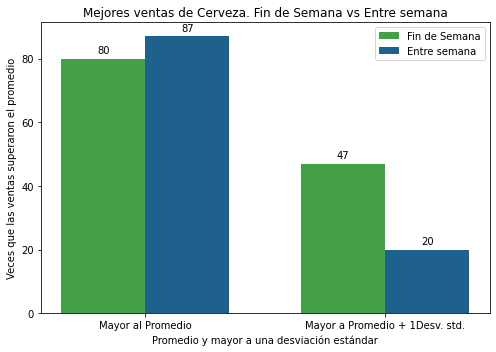

In [17]:
labels = ['Mayor al Promedio', 'Mayor a Promedio + 1Desv. std.']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(7,5))
rects1 = ax.bar(x - width/2, weekend_sells, width, label='Fin de Semana', color = '#43a047')
rects2 = ax.bar(x + width/2, week_sells, width, label='Entre semana', color = '#1f618d')

ax.set_title('Mejores ventas de Cerveza. Fin de Semana vs Entre semana')
ax.set_ylabel('Veces que las ventas superaron el promedio')
ax.set_xlabel('Promedio y mayor a una desviación estándar')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='best')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 5 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [18]:
def bool_and_major_matches(bool_array, bool_wanted, numeric_array, start_limit):
    if len(bool_array) == len(numeric_array):
        match_cases = []

        #Creating Support dictionaries
        
        for ub in range(len(bool_array)):
            bool_val = bool_array[ub]
            numeric_val = numeric_array[ub]
            if bool_val == bool_wanted and numeric_val >= start_limit:
                match_cases.append(ub)
            
        return match_cases
    else: pass

def bool_and_minor_matches(bool_array, bool_wanted, numeric_array, end_limit):
    if len(bool_array) == len(numeric_array):
        match_cases = []

        #Creating Support dictionaries
        
        for ub in range(len(bool_array)):
            bool_val = bool_array[ub]
            numeric_val = numeric_array[ub]
            if bool_val == bool_wanted and numeric_val <= end_limit:
                match_cases.append(ub)
            
        return match_cases
    else: pass

In [19]:
print('Mejores ventas en días que:')
rainy_and_weekend_best_sells = bool_and_major_matches(best_week_day, True, best_precipitation, 0.01)
ndays_raw_bs = len(rainy_and_weekend_best_sells)
print(f'-> llovieron y eran fin de semana: {ndays_raw_bs}')

dry_and_weekend_best_sells = bool_and_minor_matches(best_week_day, True, best_precipitation, 0)
ndays_daw_bs = len(dry_and_weekend_best_sells)
print(f'-> no llovieron y eran fin de semana: {ndays_daw_bs}')

rainy_and_middle_week_best_sells = bool_and_major_matches(best_week_day, False, best_precipitation, 0.01)
ndays_ramw_bs = len(rainy_and_middle_week_best_sells)
print(f'-> llovieron y eran en mitad de semana: {ndays_ramw_bs}')

dry_and_middleweek_best_sells = bool_and_minor_matches(best_week_day, False, best_precipitation, 0)
ndays_damw_bs = len(dry_and_middleweek_best_sells)
print(f'-> no llovieron y eran entre semana: {ndays_damw_bs}')

print(f'total = {ndays_raw_bs + ndays_daw_bs + ndays_ramw_bs + ndays_damw_bs}')

Mejores ventas en días que:
-> llovieron y eran fin de semana: 15
-> no llovieron y eran fin de semana: 32
-> llovieron y eran en mitad de semana: 6
-> no llovieron y eran entre semana: 14
total = 67


In [20]:
def amount_cases_bool_numeric(bool_array, numeric_array , minor_limit, increment):
    '''Returned data:
    1) amount_c1 = number of cases that are True and minor_limit + increment
    1) amount_c2 = number of cases that are True and minor_limit
    1) amount_c3 = number of cases that are False and minor_limit + increment
    1) amount_c4 = number of cases that are False and minor_limit'''
    
    if len(bool_array)==len(numeric_array):
        search_value = minor_limit + increment
        amount_cases = [0,0,0,0]

        amount_cases[0] = len(bool_and_major_matches(bool_array, True, numeric_array, search_value))
        amount_cases[1] = len(bool_and_minor_matches(bool_array, True, numeric_array, minor_limit))
        
        amount_cases[2] = len(bool_and_major_matches(bool_array, False, numeric_array, search_value))
        amount_cases[3] = len(bool_and_minor_matches(bool_array, False, numeric_array, minor_limit))

        return amount_cases
    else: pass

In [21]:
temp_and_weekend_best_sells = []

#temp and weeekend considered = taw
taw_best_sells = amount_cases_bool_numeric(best_week_day, best_av_temp, np.mean(av_temp), 0.01)

print('Mejores ventas en días que:')

print(f'-> Era fin de semana caluroso: {taw_best_sells[0]}')
print(f'-> Era fin de semana fresco/frío: {taw_best_sells[1]}')
print(f'-> Día entre semana, caluroso: {taw_best_sells[2]}')
print(f'-> Día entre semana, fresco/frío: {taw_best_sells[3]}')

print(f'total = {np.sum(taw_best_sells)}')

Mejores ventas en días que:
-> Era fin de semana caluroso: 34
-> Era fin de semana fresco/frío: 13
-> Día entre semana, caluroso: 19
-> Día entre semana, fresco/frío: 1
total = 67


In [23]:
hot_bs_days = [0,0]
cold_bs_days = [0,0]

hot_bs_days[0],hot_bs_days[1] = taw_best_sells[0], taw_best_sells[2]
cold_bs_days[0],cold_bs_days[1] = taw_best_sells[1], taw_best_sells[3]

print(f'Días calurosos: {np.sum(hot_bs_days)}')
print(f'Días fríos/frescos: {np.sum(cold_bs_days)}')

Días calurosos: 53
Días fríos/frescos: 14


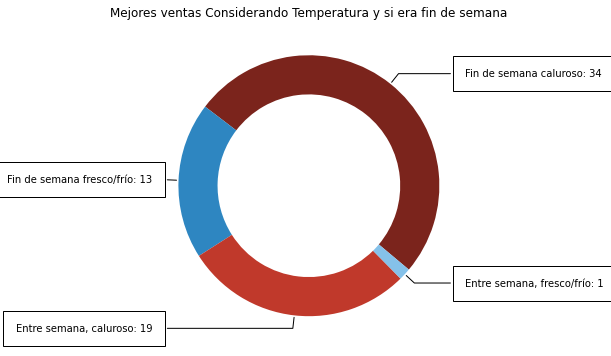

In [34]:
#Making of labels
taw_labels = [0,0,0,0]
taw_labels[0]= 'Fin de semana caluroso: ' + str(taw_best_sells[0])
taw_labels[1]= 'Fin de semana fresco/frío: ' + str(taw_best_sells[1])
taw_labels[2]= 'Entre semana, caluroso: ' + str(taw_best_sells[2])
taw_labels[3]= 'Entre semana, fresco/frío: ' + str(taw_best_sells[3])

#colors
pie_colors = ['#7b241c', '#2e86c1','#c0392b','#85c1e9']

#Creating plot
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(taw_best_sells, wedgeprops=dict(width=.3), startangle=-40, colors=pie_colors)

bbox_props = dict(boxstyle="square,pad=1.25", fc="w", ec="k", lw=1)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    
    ax.annotate(taw_labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.1*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Mejores ventas Considerando Temperatura y si era fin de semana")

plt.show()

In [54]:
category = []

for i in range(len(beer_consumed)):
    if beer_consumed[i] >= (np.mean(beer_consumed) + np.std(beer_consumed)):
        #Hot Cases
        if av_temp[i] >= np.mean(av_temp) and was_a_weekend[i] == True:
            category.append('Hot Weekend')
        elif av_temp[i] >= np.mean(av_temp) and was_a_weekend[i] == False:
            category.append('Hot and Not Weekend')

        #Cold Cases
        elif av_temp[i] <= np.mean(av_temp) and was_a_weekend[i] == True:
            category.append('Cold/Fresh Weekend')
        elif av_temp[i] <= np.mean(av_temp) and was_a_weekend[i] == False:
            category.append('Cold/Fresh and Not Weekend')
    else:
        category.append('N/A')

print(np.mean(av_temp))
cerveza_df.head()

21.226356164383564


,date,av_temp,min_temp,max_temp,precipitation,was_a_weekend,beer_consumed,category
0,2015-01-01,27.30,23.9,32.5,0.0,False,25461,N/A
1,2015-01-02,27.02,24.5,33.5,0.0,False,28972,N/A
2,2015-01-03,24.82,22.4,29.9,0.0,True,30814,Hot Weekend
3,2015-01-04,23.98,21.5,28.6,1.2,True,29799,Hot Weekend
4,2015-01-05,23.82,21.0,28.3,0.0,False,28900,N/A


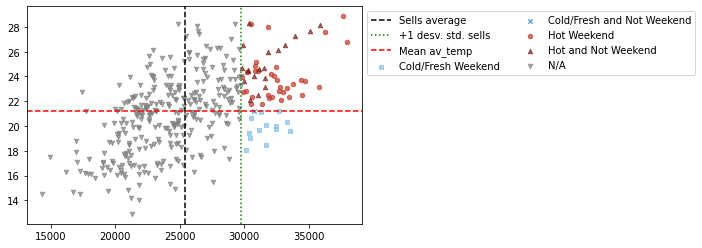

In [86]:
x=cerveza_df['beer_consumed']
y=cerveza_df['av_temp']
groups=cerveza_df.groupby('category')
#[,N/A]
scatter_colors = ['#85c1e9','#2e86c1','#c0392b','#7b241c', 'grey']
from mlxtend.plotting import category_scatter

fig = category_scatter(x = 'beer_consumed', y = 'av_temp', label_col='category',
                       data=cerveza_df, colors=scatter_colors)

plt.axvline(np.mean(x), c = 'k', linestyle = '--', label = 'Sells average')
plt.axvline(np.mean(x)+np.std(x), c = 'g', linestyle = ':', label = '+1 desv. std. sells')

plt.axhline(np.mean(y), c = 'r', linestyle = '--', label = 'Mean av_temp')

plt.legend(loc='best', bbox_to_anchor=(1,1), ncol=2)

plt.show()



/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


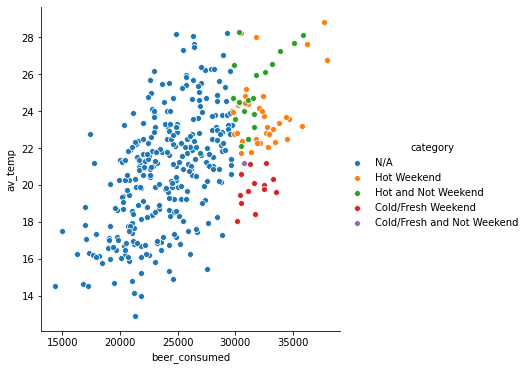

In [74]:
x=cerveza_df['beer_consumed']
y=cerveza_df['av_temp']

groups = cerveza_df.groupby('category')
sns_colors = ['grey', '#7b241c', '#2e86c1','#c0392b','#85c1e9']
sns.pairplot(x_vars=["beer_consumed"], y_vars=["av_temp"], data=cerveza_df, hue="category", size=5)